图表已成功保存到：C:\Users\joe-h\Desktop\分布式占全社会比重.png


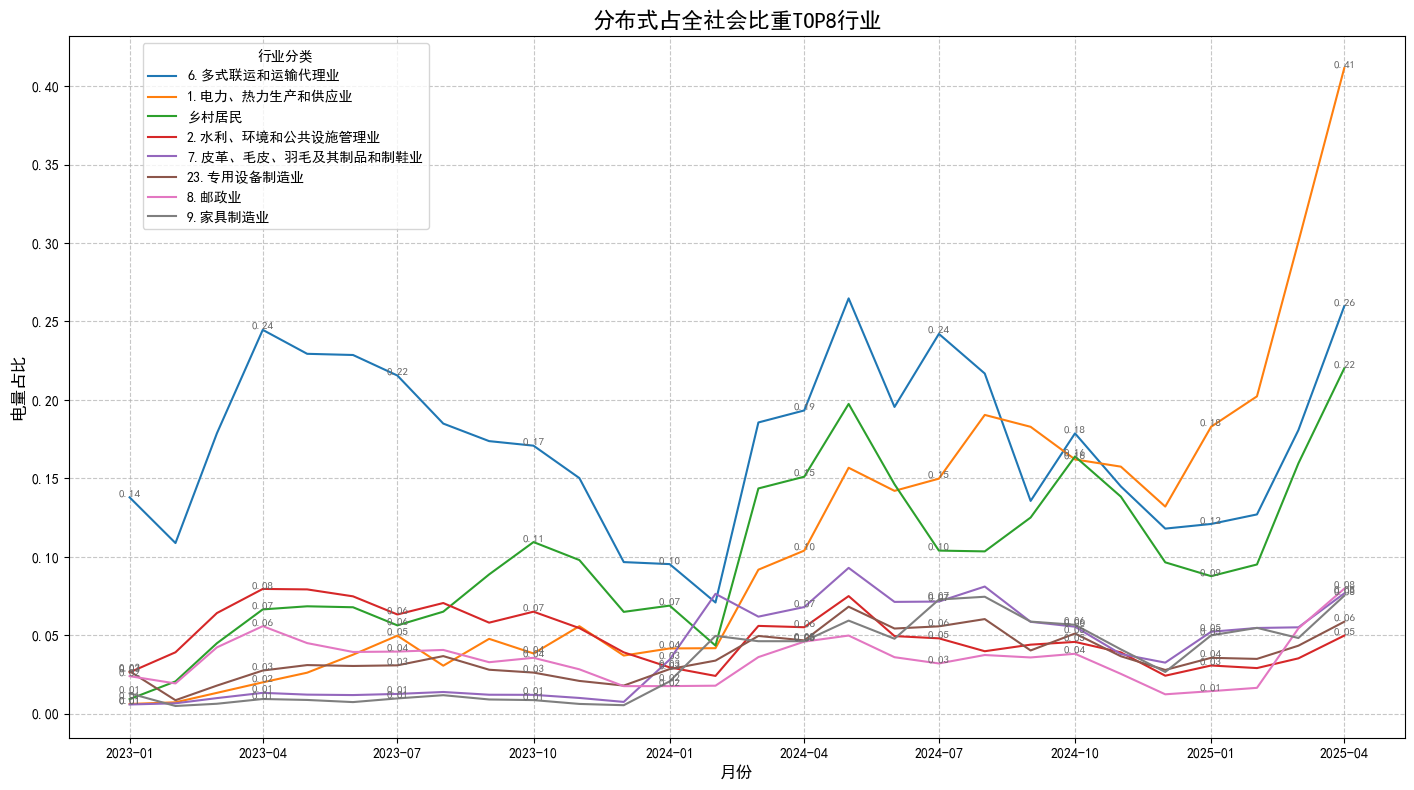

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置 Matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为 SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号'-'显示为方块的问题

# 文件路径
file_path = 'C:\\Users\\joe-h\\Desktop\\分布式光伏.xlsx'
# 指定要读取的工作表名称
sheet_name = '（4）占全社会比重'

# 图片保存路径和文件名
save_dir = 'C:\\Users\\joe-h\\Desktop\\'
output_filename = '分布式占全社会比重.png'
output_path = os.path.join(save_dir, output_filename)
annotation_interval = 3 

try:
    # 读取 Excel 文件，指定 sheet_name
    # 第一列作为索引（行业分类），跳过表头行（如果数据从第二行开始）
    df = pd.read_excel(file_path, engine='openpyxl', sheet_name=sheet_name, header=0, index_col=0)

    # 将列名（日期字符串）转换为标准的日期格式
    df.columns = pd.to_datetime(df.columns, format='%Y%m')

    # 对数据进行转置，使日期成为行索引，行业分类成为列
    df_transposed = df.T

    # 绘制时序图
    plt.figure(figsize=(15, 8)) # 设置图幅大小，可以根据需要调整
    # 遍历每一列（现在代表行业分类），绘制折线图并标注最新点
    for column in df_transposed.columns:
        plt.plot(df_transposed.index, df_transposed[column], label=column)

        # 标注数据点 (每隔 annotation_interval 个点标注一次)
        for i in range(0, len(df_transposed.index), annotation_interval):
            date_to_annotate = df_transposed.index[i]
            value_to_annotate = df_transposed[column].iloc[i]
            plt.text(date_to_annotate, value_to_annotate, f'{value_to_annotate:.2f}',
                     fontsize=8, ha='center', va='bottom', color='dimgrey') # 使用暗灰色标注
            
    plt.title(f'分布式占全社会比重TOP8行业', fontsize=16) # 标题中包含工作表名称
    plt.xlabel('月份', fontsize=12)
    plt.ylabel('电量占比', fontsize=12)
    plt.legend(title='行业分类', bbox_to_anchor=(0.05, 1), loc='upper left') # 显示图例，并放置在图的右侧
    plt.grid(True, linestyle='--', alpha=0.7) # 显示网格
    plt.tight_layout(rect=[0, 0, 0.95, 1]) # 调整布局，避免图例与图表重叠

    # --- 保存图片到本地 ---
    # 确保保存目录存在
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(output_path, dpi=300, bbox_inches='tight') # dpi 设置分辨率，bbox_inches='tight' 裁剪掉多余空白
    print(f"图表已成功保存到：{output_path}")

    plt.show() # 显示图表窗口

except FileNotFoundError:
    print(f"错误：文件未找到。请检查路径是否正确：{file_path}")
except ValueError as ve:
    # 捕获 sheet_name 不存在的错误
    if f"Worksheet named '{sheet_name}' not found" in str(ve):
        print(f"错误：Excel文件中未找到名为 '{sheet_name}' 的工作表。请检查工作表名称是否正确。")
    else:
        print(f"发生值错误：{ve}")
except Exception as e:
    print(f"发生其他错误：{e}")

堆叠面积图已成功保存到：C:\Users\joe-h\Desktop\分布式光伏堆叠图.png


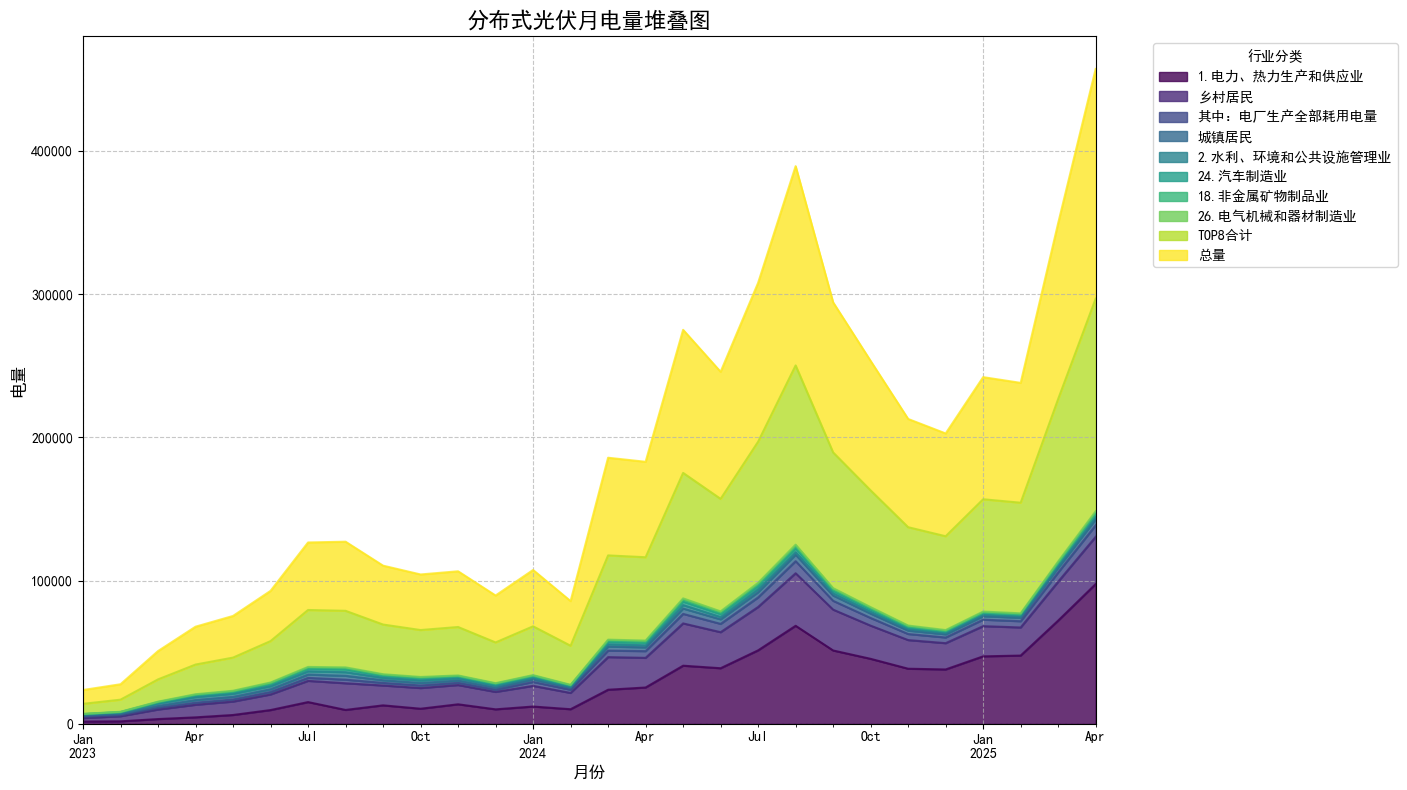

C:\Users\joe-h\AppData\Local\Temp\ipykernel_21268\2680678185.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_bar['行业分类'], rotation=45, ha='right')


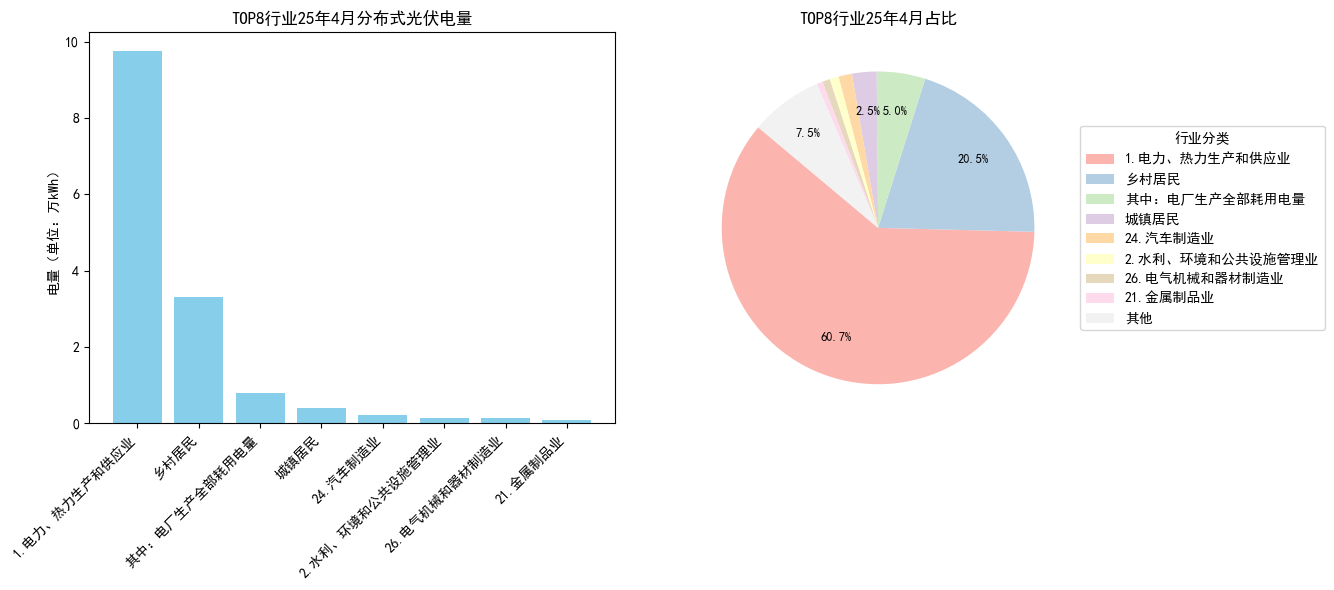

图表已保存到：C:\Users\joe-h\Desktop\行业分布式光伏图表.png


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 读取 Excel 文件
df = pd.read_excel(
    r'C:\Users\joe-h\Desktop\分布式光伏.xlsx',
    sheet_name='（3）2025年4月分布式占比'
)

# 如果占比是百分数，需要先转为小数（如有）
if df['占分布式光伏电量总比重'].max() > 1:
    df['占分布式光伏电量总比重'] /= 100

# 添加“其他”行业补足到 1
known_total = df['占分布式光伏电量总比重'].sum()
if known_total < 1:
    other_share = 1 - known_total
    df = pd.concat([df, pd.DataFrame({
        '行业分类': ['其他'],
        '占分布式光伏电量总比重': [other_share],
        '4月分布式光伏电量': [0]
    })], ignore_index=True)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建画布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 子图1：柱状图（不含“其他”）
df_bar = df[df['行业分类'] != '其他']
axes[0].bar(df_bar['行业分类'], df_bar['4月分布式光伏电量'], color='skyblue')
axes[0].set_title('TOP8行业25年4月分布式光伏电量')
axes[0].set_ylabel('电量（单位：万kWh）')
axes[0].set_xticklabels(df_bar['行业分类'], rotation=45, ha='right')

# 子图2：普通饼图，只显示百分比标注
ax = axes[1]
sizes = df['占分布式光伏电量总比重']
labels = df['行业分类']
colors = plt.cm.Pastel1.colors

wedges, texts, autotexts = ax.pie(
    sizes,
    startangle=140,
    colors=colors,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 2 else '',  # 只显示大于0.5%的百分比
    pctdistance=0.75,  # 百分比距离圆心距离，稍远点，避免重叠
    textprops={'fontsize': 9, 'color': 'black'}
)

# 添加图例（显示行业名称）
ax.legend(wedges, labels, title='行业分类', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('TOP8行业25年4月占比')

plt.tight_layout()

# 保存图片
output_path = os.path.expanduser(r'~\Desktop\行业分布式光伏图表.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()
print(f'图表已保存到：{output_path}')


In [ ]:
（3）2025年4月分布式占比